# Importing libraries

In [ ]:
#Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow==2.14.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.9/489.9 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 79.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 88.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 9.0 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.8.0
    Uninstalling keras-3.8.0:
      Successfully uninstalled keras-3.8.0
  Attempting uninstall: google-auth-oauthlib
    Found existing ins

In [ ]:
# !pip install tensorflow==2.14.0

In [ ]:
import tensorflow as tf
print(tf.__version__)


2.14.0


In [ ]:
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
import keras.layers as L
import keras.models as M
import keras.initializers as I
import keras.backend as K
from keras import optimizers
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import cv2,os
from PIL import Image, ImageOps
from google.colab.patches import cv2_imshow
import csv
import math
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix , classification_report,accuracy_score, ConfusionMatrixDisplay, recall_score
from keras.layers import BatchNormalization
import os
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder


In [ ]:
data_path='/content/drive/MyDrive/Dataset/LungandColonCancer/lung_colon_image_set/lung_image_sets'
categories=os.listdir(data_path)

print(categories)
labels = ['lung_scc', 'lung_n','lung_aca']
label_dict = {label: i for i, label in enumerate(labels)}

['lung_aca', 'lung_n', 'lung_scc']


In [ ]:
img_size=64

In [ ]:
folder='/content/drive/MyDrive/Dataset/LungandColonCancer/lung_colon_image_set/lung_image_sets'
images = []
img_labels = []
for label in labels:
    path = f"{folder}/{label}"
    for filename in os.listdir(path):
        # img = Image.open(os.path.join(path, filename)).convert('L')  # grayscale
        img = Image.open(os.path.join(path, filename))
        img = img.resize((img_size, img_size))
        img = np.array(img)
        if img is not None:
            images.append(img)
            img_labels.append(label_dict[label])
data=np.array(images)
label=np.array(img_labels)
print('data', data.shape)
print('label', label.shape)

data (12330, 64, 64, 3)
label (12330,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data,label, test_size=0.2, random_state=42)
X_train = X_train.astype('float32') / 255.
X_train = X_train.reshape(-1, img_size, img_size, 3)
y_train = np.array(to_categorical(y_train.astype('float32')))

X_test = X_test.astype('float32') / 255.
X_test = X_test.reshape(-1, img_size, img_size, 3)
y_test = np.array(to_categorical(y_test.astype('float32')))
print(X_train.shape)


(9864, 64, 64, 3)


In [ ]:
# تحويل التسميات النصية إلى أرقام
# label_encoder = LabelEncoder()
# labels_encoded = label_encoder.fit_transform(class_labels)
# labels_one_hot = to_categorical(labels_encoded)

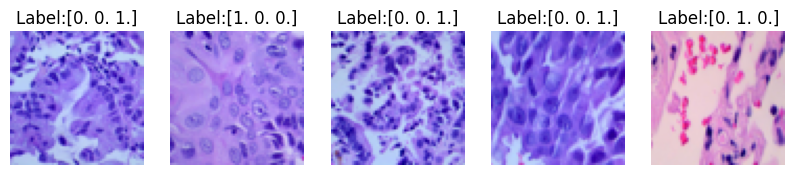

In [ ]:
n_samples=5
plt.figure(figsize=(n_samples * 2, 3))
for index in range(n_samples):
    plt.subplot(1, n_samples, index + 1)
    sample_image = X_test[index]
    plt.imshow(sample_image, cmap="binary")
    plt.title("Label:" + str(y_test[index]))
    plt.axis("off")

plt.show()


In [ ]:
# from sklearn.model_selection import train_test_split

# # Split the data into training (80%), validation (10%), and test (10%) sets
# X_train, X_temp, y_train, y_temp = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)
# X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print shapes to verify
print("Train data shape:", X_train.shape)
# print("Validation data shape:", X_valid.shape)
print("Test data shape:", X_test.shape)

Train data shape: (9864, 64, 64, 3)
Test data shape: (2466, 64, 64, 3)


In [ ]:
#Define the range of batch size for network
def find_factors(n):
    factors = []
    for i in range(1, n + 1):
        if n % i == 0:
            factors.append(i)
    return factors


print(find_factors(X_train.shape[0]))

[1, 2, 3, 4, 6, 8, 9, 12, 18, 24, 36, 72, 137, 274, 411, 548, 822, 1096, 1233, 1644, 2466, 3288, 4932, 9864]


In [ ]:
# Makign the squash function
def squash(vectors, axis=-1):
    squared_norm = K.sum(K.square(vectors), axis, keepdims=True)
    scale = squared_norm / (1 + squared_norm) / (K.sqrt(squared_norm) + K.epsilon())
    return scale * vectors

In [ ]:
# Making capsule layer from scratch
class CapsuleLayer(L.Layer):
    def __init__(self, num_capsule, dim_capsule, routing=3, kernel_initializer='glorot_uniform', **kwargs):
        super(CapsuleLayer, self).__init__(**kwargs)
        self.num_capsule = num_capsule
        self.dim_capsule = dim_capsule
        self.routing = routing
        self.kernel_initializer = kernel_initializer

    def build(self, input_shape):
        assert len(input_shape) >= 3
        self.input_num_capsule = input_shape[1]
        self.input_dim_capsule = input_shape[2]

        # transforming the matrix
        self.W = self.add_weight(
            shape=[self.num_capsule, self.input_num_capsule, self.dim_capsule, self.input_dim_capsule],
            initializer=self.kernel_initializer, name='w')
        self.built = True

    def call(self, inputs, training=None):
        input_expand = tf.expand_dims(tf.expand_dims(inputs, 1), -1)
        inputs_tiled = K.tile(input_expand, [1, self.num_capsule, 1, 1, 1])
        input_hat = tf.squeeze(tf.map_fn(lambda x: tf.matmul(self.W, x), elems=inputs_tiled))
        # b = tf.zeros(shape=[inputs.shape[0], self.num_capsule, 1, self.input_num_capsule])
        b = tf.zeros(shape=[tf.shape(inputs)[0], self.num_capsule, 1, self.input_num_capsule])

        assert self.routing > 0
        for i in range(self.routing):
            c = tf.nn.softmax(b, axis=1)
            output = squash(tf.matmul(c, input_hat))
            if i < self.routing - 1:
                b += tf.matmul(output, input_hat, transpose_b=True)
        return tf.squeeze(output)

    def compute_output_shape(self, input_shape):
        return tuple([None, self.num_capsule, self.dim_capsule])

    def get_config(self):
        config = {
            'num_capsule': self.num_capsule,
            'dim_capsule': self.dim_capsule,
            'routings': self.routings
        }
        base_config = super(CapsuleLayer, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

In [ ]:

from keras.src.layers import MaxPooling2D
from keras.src.layers.regularization.dropout import Dropout
batch_size = 2

img_shape = (img_size, img_size, 3)

# # Define a custom input layer with a hardcoded batch size
input_layer = L.Input(batch_shape=(batch_size,) + img_shape)


from keras.layers import DepthwiseConv2D, GlobalAveragePooling2D, Reshape, Multiply

def powerfeature(input_layer, num_layers, expansion_factor, reduction_factor=0.9):

    x = L.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(input_layer)
    x = L.Dropout(0.2)(x)
    x = L.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(x)
    x = L.MaxPooling2D((2, 2))(x)

    x = L.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(x)
    x = L.Dropout(0.3)(x)
    x = L.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(x)
    x = L.MaxPooling2D((2, 2))(x)


    for _ in range(num_layers):
        x1 = L.Conv2D(2 * expansion_factor, (3, 3), kernel_initializer='he_normal', padding='same')(x)
        x1 = L.Dropout(0.2)(x1)
        x1 = L.Conv2D(expansion_factor, (3, 3), kernel_initializer='he_normal', padding='same')(x1)
        x = L.Concatenate()([x, x1])


    # Attention Mechanism
    attention = GlobalAveragePooling2D()(x)
    attention = Reshape((1, 1, K.int_shape(x)[-1]))(attention)
    attention = L.Conv2D(K.int_shape(x)[-1] // 16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(attention)
    attention = L.Conv2D(K.int_shape(x)[-1], (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(attention)
    x = Multiply()([x, attention])


 # Transition Mechanism
    contracted_filters = int(K.int_shape(x)[-1] * reduction_factor)

    x = L.Conv2D(contracted_filters, (3, 3), kernel_initializer='he_normal', padding='same')(x)
    x = L.Dropout(0.5)(x)
    x = L.Conv2D(contracted_filters, (3, 3), kernel_initializer='he_normal', padding='same')(x)
    x = L.MaxPooling2D((2, 2))(x)

    return x


x = powerfeature(input_layer,num_layers=2, expansion_factor=4)



#Primary Capsule Layer
conv2 = L.Conv2D(filters=8 * 16, kernel_size=(3, 3), strides=(2, 2), padding='same')(x)
reshape2 = L.Reshape([-1, 8])(conv2)  # Reduce dimensions here
squashed_output = L.Lambda(squash)(reshape2)


In [ ]:
lungcaps = CapsuleLayer(num_capsule=3, dim_capsule=8, routing=3, name='lungcaps')(squashed_output)

In [ ]:
# Making length layer which will calculate the length of the vectors
class Length(L.Layer):
    def call(self, inputs, **kwargs):
        return tf.sqrt(tf.reduce_sum(tf.square(inputs), -1))

    def compute_output_shape(self, input_shape):
        return input_shape[:-1]

    def get_config(self):
        config = super(Length, self).get_config()
        return config


In [ ]:
# Layer 4: This is an auxiliary layer to replace each capsule with its length. Just to match the true label's shape.
# If using tensorflow, this will not be necessary. :)
out_caps = Length(name='capsnet')(lungcaps)

In [ ]:
# Making the masking layer
class Mask(L.Layer):
    def call(self, inputs, **kwargs):
        if type(inputs) is list:
            assert len(inputs) == 2
            inputs, mask = inputs
        else:
            x = tf.sqrt(tf.reduce_sum(tf.square(inputs), -1))
            mask = tf.one_hot(indices=tf.argmax(x, 1), depth=x.shape[1])
        masked = K.batch_flatten(inputs * tf.expand_dims(mask, -1))
        return masked

    def compute_output_shape(self, input_shape):
        if type(input_shape[0]) is tuple:  # true label provided
            return tuple([None, input_shape[0][1] * input_shape[0][2]])
        else:  # no true label provided
            return tuple([None, input_shape[1] * input_shape[2]])

    def get_config(self):
        config = super(Mask, self).get_config()
        return config

In [ ]:
y = L.Input(shape=(3,))
print(y.shape)
print(lungcaps.shape)
masked_by_y = Mask()([lungcaps, y])  # The true label is used to mask the output of capsule layer. For training
print(masked_by_y.shape)
masked = Mask()(lungcaps)
print(masked.shape)


(None, 3)
(2, 3, 8)
(2, 24)
(2, 24)


In [ ]:
input_shape = X_train.shape[1:]
decoder = M.Sequential(name='decoder')
decoder.add(L.Dense(128, activation='relu', input_dim=8 * 3))
decoder.add(L.Dense(512, activation='relu'))
decoder.add(L.Dense(img_size * img_size * 3, activation='softmax'))
decoder.add(L.Reshape(target_shape=input_shape, name='out_recon'))


In [ ]:
# Making models
train_model = M.Model([input_layer, y], [out_caps, decoder(masked_by_y)])
eval_model = M.Model(input_layer, [out_caps, decoder(masked)])

In [ ]:
# Making the loss function
# import tensorflow as tf

# def margin_loss(y_true, y_pred):
#     # Cast y_true to float32
#     y_true = tf.cast(y_true, tf.float32)

#     # Calculate the margin loss
#     L = y_true * tf.square(tf.maximum(0., 0.9 - y_pred)) + \
#         0.5 * (1 - y_true) * tf.square(tf.maximum(0., y_pred - 0.1))
#     return tf.reduce_mean(tf.reduce_sum(L, 1))

def margin_loss(y_true, y_pred):
    L = y_true * tf.square(tf.maximum(0., 0.9 - y_pred)) + \
        0.5 * (1 - y_true) * tf.square(tf.maximum(0., y_pred - 0.1))
    return tf.reduce_mean(tf.reduce_sum(L, 1))

In [ ]:
train_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(2, 64, 64, 3)]             0         []                            
                                                                                                  
 conv2d (Conv2D)             (2, 64, 64, 64)              1792      ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (2, 64, 64, 64)              0         ['conv2d[0][0]']              
                                                                                                  
 conv2d_1 (Conv2D)           (2, 64, 64, 64)              36928     ['dropout[0][0]']             
                                                                                              

In [ ]:
train_model.save_weights('/content/drive/MyDrive/models/lung_model.weights.h5')
train_model.load_weights('/content/drive/MyDrive/models/lung_model.weights.h5')


In [ ]:
n_samples = 5

In [ ]:
# plt.figure(figsize=(n_samples * 2, 3))
# for index in range(n_samples):
#     plt.subplot(1, n_samples, index + 1)
#     sample_image = x_test[index]
#     plt.imshow(sample_image, cmap="binary")
#     plt.title("Label:" + str(y_test[index]))
#     plt.axis("off")

# plt.show()

In [ ]:
m = batch_size
epochs = 60
# Using EarlyStopping, end training when val_accuracy is not improved for 10 consecutive times
early_stopping = keras.callbacks.EarlyStopping(monitor='val_capsnet_accuracy', mode='max',
                                               patience=2, restore_best_weights=True)


In [ ]:
print(X_train.shape)  # should be (num_samples, 28, 28, 1) or something similar
print(y_train.shape)  # should be (num_samples, 3) given your model summary
print(X_test.shape)   # should be (num_test_samples, 28, 28, 1) or similar
print(y_test.shape)   # should be (num_test_samples, 3)


(9864, 64, 64, 3)
(9864, 3)
(2466, 64, 64, 3)
(2466, 3)


In [ ]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_capsnet_accuracy', mode='max', factor=0.5, patience=4)
train_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999), loss=[margin_loss, 'mse'], loss_weights=[1., 0.0005],
                    metrics=['accuracy'])

history= train_model.fit([X_train, y_train], [y_train, X_train], batch_size=m, epochs=epochs,
                validation_data=([X_test, y_test], [y_test, X_test])
                # , callbacks=[tensorboard_callback]
                )


Epoch 1/60
4932/4932 [==============================] - 289s 58ms/step - loss: 0.3245 - capsnet_loss: 0.3242 - decoder_loss: 0.5212 - capsnet_accuracy: 0.4002 - decoder_accuracy: 0.3351 - val_loss: 0.3628 - val_capsnet_loss: 0.3625 - val_decoder_loss: 0.5207 - val_capsnet_accuracy: 0.3893 - val_decoder_accuracy: 0.3373
Epoch 2/60
4932/4932 [==============================] - 285s 58ms/step - loss: 0.3225 - capsnet_loss: 0.3222 - decoder_loss: 0.5212 - capsnet_accuracy: 0.3956 - decoder_accuracy: 0.3387 - val_loss: 0.3050 - val_capsnet_loss: 0.3048 - val_decoder_loss: 0.5207 - val_capsnet_accuracy: 0.4161 - val_decoder_accuracy: 0.3412
Epoch 3/60
4932/4932 [==============================] - 284s 58ms/step - loss: 0.3229 - capsnet_loss: 0.3227 - decoder_loss: 0.5212 - capsnet_accuracy: 0.3941 - decoder_accuracy: 0.3427 - val_loss: 0.3099 - val_capsnet_loss: 0.3096 - val_decoder_loss: 0.5207 - val_capsnet_accuracy: 0.3893 - val_decoder_accuracy: 0.3468
Epoch 4/60
4932/4932 [===============

In [ ]:
evaluation_results = train_model.evaluate([X_test, y_test], [y_test, X_test], batch_size=m, verbose=0)
# print("Test Loss:", evaluation_results[0])
# print("Test Accuracy:", evaluation_results[3])

test_loss = evaluation_results[1]
test_accuracy = evaluation_results[3]

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Test Loss: 0.0161
Test Accuracy: 98.13%


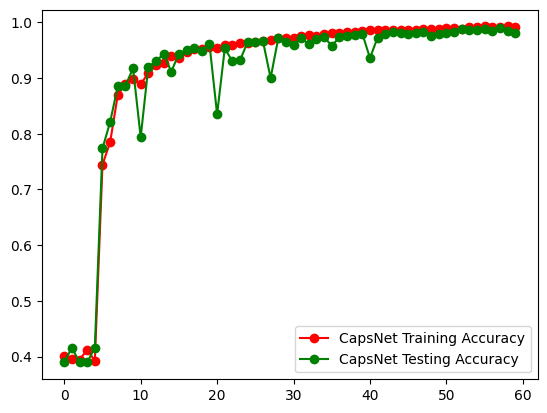

In [ ]:
plt.plot(history.history["capsnet_accuracy"] , 'ro-' , label = "CapsNet Training Accuracy")
plt.plot(history.history["val_capsnet_accuracy"] , 'go-' , label = "CapsNet Testing Accuracy")
plt.legend()
plt.show()

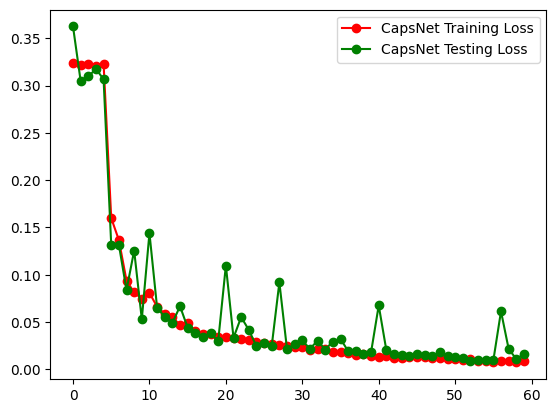

In [ ]:
plt.plot(history.history["capsnet_loss"] , 'ro-' , label = "CapsNet Training Loss")
plt.plot(history.history["val_capsnet_loss"] , 'go-' , label = "CapsNet Testing Loss")
plt.legend()
plt.show()

In [ ]:
classes = {0: ('1','lung_n'),
           1: ('2','lung_scc'),
           2: ('3','lung_aca'),


           }

In [ ]:
y_pred_list = train_model.predict([X_test, y_test], batch_size=m, verbose=0)  # Providing both image and label data
y_pred_capsnet = y_pred_list[0]   # Getting the output from the capsnet layer
y_pred_labels = np.argmax(y_pred_capsnet, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

print(y_pred_labels.shape)


(2466,)


In [ ]:
target_names = [f"{classes[i]}" for i in range(3)]
print(classification_report(y_test_labels, y_pred_labels, target_names=target_names))

                   precision    recall  f1-score   support

  ('1', 'lung_n')       1.00      0.91      0.95       480
('2', 'lung_scc')       1.00      1.00      1.00      1026
('3', 'lung_aca')       0.96      1.00      0.98       960

         accuracy                           0.98      2466
        macro avg       0.98      0.97      0.98      2466
     weighted avg       0.98      0.98      0.98      2466



1233/1233 [==============================] - 12s 9ms/step
A.I predicts: [1. 0. 0.]


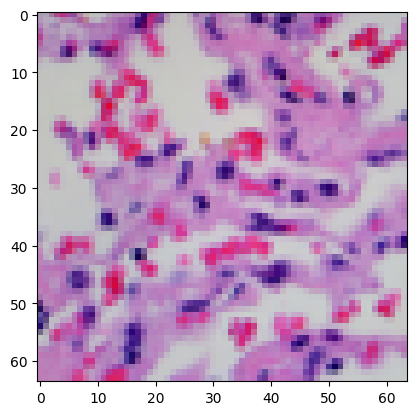

In [ ]:
# from keras.models import Model
# simplified_model = Model(inputs=train_model.input, outputs=train_model.get_layer('capsnet').output)
# y_pred_capsnet = simplified_model.predict([X_test, y_test], batch_size=m)
# y_pred_labels = np.argmax(y_pred_capsnet, axis=1)

# X = 130

# # Preprocessing the image
# img_single = X_test[X]
# img_single_exp = np.expand_dims(img_single, 0)
# img_single_exp = img_single_exp.reshape(img_single_exp.shape[0], img_size, img_size,3)

# # Ensure y_test is 2D (like one-hot encoded labels)
# if len(y_test.shape) != 2:
#     print("y_test doesn't have two dimensions. Please check its shape!")
# else:
#     # Creating a dummy label to make a prediction since our model expects 2 inputs
#     dummy_label = np.zeros((1, y_test.shape[1]))

#     # Making the prediction for the single image
#     # predictions_list = train_model.predict([img_single_exp, dummy_label])


#     predictions_single = y_pred_labels[0]  # Extracting capsnet predictions

#         # Ensure the predicted category index doesn't exceed the categories list length
#     predicted_index = np.argmax(predictions_single)
#     if predicted_index >= len(train_img_labels):
#         print("Predicted index out of range for categories list!")
#     else:
#         print('A.I predicts:',train_img_labels[predicted_index])

# # Visualizing the preprocessed image
# plt.imshow(np.squeeze(img_single_exp), cmap='gray')
# plt.grid(False)
# plt.show()

from keras.models import Model
simplified_model = Model(inputs=train_model.input, outputs=train_model.get_layer('capsnet').output)
y_pred_capsnet = simplified_model.predict([X_test, y_test], batch_size=m)
y_pred_labels = np.argmax(y_pred_capsnet, axis=1)

X = 130

# Preprocessing the image
img_single = X_test[X]
img_single_exp = np.expand_dims(img_single, 0)
img_single_exp = img_single_exp.reshape(img_single_exp.shape[0], img_size, img_size, 3)

# Ensure y_test is 2D (like one-hot encoded labels)
if len(y_test.shape) != 2:
    print("y_test doesn't have two dimensions. Please check its shape!")
else:
    # Creating a dummy label to make a prediction since our model expects 2 inputs
    dummy_label = np.zeros((1, y_test.shape[1]))

    # Making the prediction for the single image
    # predictions_list = train_model.predict([img_single_exp, dummy_label])


    predictions_single = y_pred_labels[0]  # Extracting capsnet predictions

        # Ensure the predicted category index doesn't exceed the categories list length
    predicted_index = np.argmax(predictions_single)
    if predicted_index >= len(y_train):
        print("Predicted index out of range for categories list!")
    else:
        print('A.I predicts:',y_train[predicted_index])

# Visualizing the preprocessed image
plt.imshow(np.squeeze(img_single_exp), cmap='gray')
plt.grid(False)
plt.show()


In [ ]:
from keras.models import Model
simplified_model = Model(inputs=train_model.input, outputs=train_model.get_layer('capsnet').output)
y_pred_capsnet = simplified_model.predict([X_test, y_test], batch_size=m)
y_pred_labels = np.argmax(y_pred_capsnet, axis=1)



1233/1233 [==============================] - 12s 9ms/step


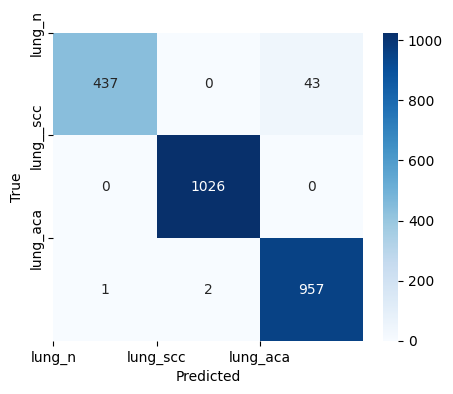

In [ ]:
from mlxtend.plotting import plot_confusion_matrix

if y_test.shape[1] > 1:  # This checks if y_test is one-hot encoded
    y_test_labels = np.argmax(y_test, axis=1)
else:
    y_test_labels = y_test
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test_labels, y_pred_labels)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='g', cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(range(3), ['lung_n', 'lung_scc', 'lung_aca'], fontsize=10)
plt.yticks(range(3), ['lung_n', 'lung__scc', 'lung_aca'], fontsize=10)

plt.show()


In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from keras.models import Model
fpr = dict()
tpr = dict()
roc_auc = dict()

simplified_model = Model(inputs=train_model.input, outputs=train_model.get_layer('capsnet').output)
y_pred_capsnet = simplified_model.predict([X_test, y_test], batch_size=m).round()
y_pred_labels = np.argmax(y_pred_capsnet, axis=1)

Y_test_1hot = to_categorical(y_test).round()
Y_train_1hot = to_categorical(y_train).round()

fpr = dict()
tpr = dict()
roc_auc = dict()

# Ensure y_test is one-hot encoded, if not, convert it
if y_test.shape[1] <= 1:
    print("y_test doesn't appear to be one-hot encoded. Please check its shape!")
else:
    Y_test_1hot = y_test
    for i in range(3):
        fpr[i], tpr[i], _ = roc_curve(Y_test_1hot[:, i], y_pred_capsnet[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])


fpr["micro"], tpr["micro"], _ = roc_curve(Y_test_1hot.ravel(), y_pred_capsnet.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

1233/1233 [==============================] - 12s 10ms/step


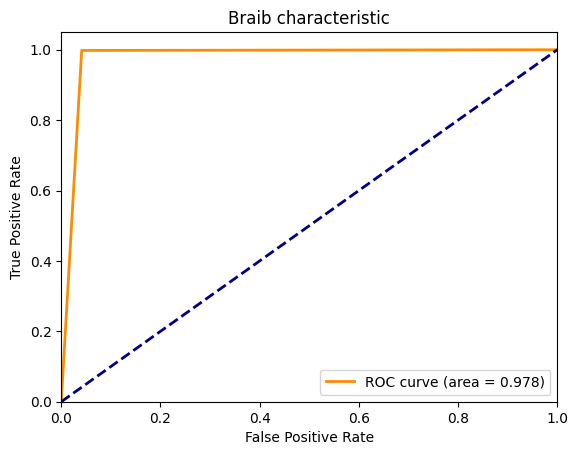

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.3f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Braib characteristic')
plt.legend(loc="lower right")
plt.show()